# Kernel Regression: From Linear to Nonlinear Modeling

## 1. Linear Regression Foundation

The goal of regression is to predict a continuous output $y$ from input features $\mathbf{x} = (x_0, x_1, ..., x_d)^T$ using a learned function $f$:

$$
y = f(\mathbf{x}) + \varepsilon
$$

where $\varepsilon$ is noise. In **linear regression**, we assume:

$$
f(\mathbf{x}) = \mathbf{w}^T\mathbf{x} 
$$

The parameters $\mathbf{w}$ and $b$ are found by minimizing the **sum of squared errors (SSE)**:

$$
\min_{\mathbf{w}} \sum_{i=1}^n (y_i - \mathbf{w}^T\mathbf{x}_i)^2
$$

---

## 2. Kernel Regression: Nonlinear Extension

### 2.1 Intuition

When relationships are nonlinear, we map inputs $\mathbf{x}$ to a high-dimensional space $\phi(\mathbf{x})$ where linear regression operates:

$$
f(\mathbf{x}) = \mathbf{w}^T \phi(\mathbf{x})
$$

**Key Idea**: Instead of computing $\phi(\mathbf{x})$ explicitly, use a **kernel function** $K(\mathbf{x}_i, \mathbf{x}_j) = \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle$.

---

### 2.2 Mathematical Formulation

The kernel regression estimator is a weighted average of training outputs:

$$
\hat{y} = \sum_{i=1}^n \alpha_i K(\mathbf{x}, \mathbf{x}_i)
$$

where weights $\alpha_i$ are learned by solving:

$$
\min_{\boldsymbol{\alpha}} \sum_{j=1}^n \left(y_j - \sum_{i=1}^n \alpha_i K(\mathbf{x}_j, \mathbf{x}_i)\right)^2
$$

In matrix form with kernel matrix $\mathbf{K}_{ij} = K(\mathbf{x}_i, \mathbf{x}_j)$:

$$
\boldsymbol{\alpha} = \mathbf{K}^{-1} \mathbf{y}
$$

*Regularized version* (for numerical stability):

$$
\boldsymbol{\alpha} = (\mathbf{K} + \lambda \mathbf{I})^{-1} \mathbf{y}
$$

---

## 3. Primal vs. Dual Perspective

### 3.1 Primal Form (Explicit Feature Space)

$$
f(\mathbf{x}) = \mathbf{w}^T \phi(\mathbf{x})
$$

- Requires explicit $\phi(\mathbf{x})$ computation
- Suitable when feature space dimension is manageable

### 3.2 Dual Form (Kernel Trick)

$$
f(\mathbf{x}) = \sum_{i=1}^n \alpha_i K(\mathbf{x}_i, \mathbf{x})
$$

- Only requires kernel evaluations
- Enables infinite-dimensional feature spaces

**Equivalence**: For invertible $\mathbf{K}$, both forms yield identical predictions.

---

## 4. Common Kernels

| Kernel Type       | Formula                                                                 | Properties                     |
|-------------------|-------------------------------------------------------------------------|--------------------------------|
| **Linear**        | $K(\mathbf{x}, \mathbf{z}) = \mathbf{x}^T \mathbf{z}$                   | Equivalent to linear regression|
| **Polynomial**    | $K(\mathbf{x}, \mathbf{z}) = (\mathbf{x}^T \mathbf{z} + c)^d$           | Captures polynomial interactions|
| **RBF (Gaussian)**| $K(\mathbf{x}, \mathbf{z}) = \exp\left(-\gamma \|\mathbf{x} - \mathbf{z}\|^2\right)$ | Local smoothing, universal approximator |

---

## 5. Practical Implementation

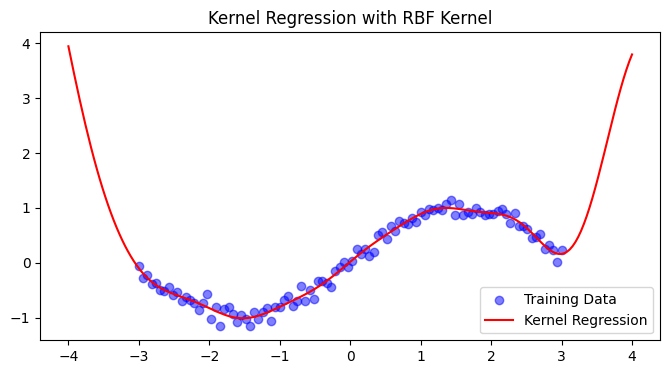

In [3]:
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.linspace(-3, 3, 100)[:, None]
y = np.sin(X).ravel() + 0.1*np.random.randn(100)

# Compute RBF kernel (σ=1.0)
K = rbf_kernel(X, X, gamma=0.5)

# Solve for coefficients (with small regularization)
alpha = np.linalg.solve(K + 1e-6*np.eye(len(X)), y)

# Predict new points
X_test = np.linspace(-4, 4, 200)[:, None]
K_test = rbf_kernel(X_test, X, gamma=0.5)
y_pred = K_test @ alpha

# Plot results
plt.figure(figsize=(8, 4))
plt.scatter(X, y, color='blue', label='Training Data', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Kernel Regression')
plt.title('Kernel Regression with RBF Kernel')
plt.legend()
plt.show()


## 6. Key Takeaways

1. **Nonlinearity via Kernels**: Maps data implicitly to high-dimensional spaces
2. **Computational Efficiency**: Avoids explicit feature computation via the kernel trick
3. **Flexibility**: Kernel choice controls model complexity (RBF for smooth functions, polynomial for interactions)
4. **Regularization**: Essential for numerical stability when $\mathbf{K}$ is ill-conditioned


## Matrix Formulation and Primal-Dual Equivalence in Kernel Regression

### 1. Primal vs. Dual Matrix Forms

In linear regression, the weight vector $\mathbf{w}$ can be estimated in two equivalent ways:  

- **Primal Form** (Feature Space):  

  $$
  \mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
  $$  

  - Requires inversion of $\mathbf{X}^T \mathbf{X} \in \mathbb{R}^{d \times d}$  
  - Computationally expensive for high-dimensional features ($d \gg n$)  

- **Dual Form** (Sample Space):  

  $$
  \mathbf{w} = \mathbf{X}^T (\mathbf{X} \mathbf{X}^T)^{-1} \mathbf{y}
  $$  

  - Inverts $\mathbf{X} \mathbf{X}^T \in \mathbb{R}^{n \times n}$ (efficient when $n \ll d$)  
  - Reveals $\mathbf{w}$ as a **linear combination of samples**: $\mathbf{w} = \sum_{i=1}^n \alpha_i \mathbf{x}_i$  

---

### 2. Proof of Equivalence

For any matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$ with full row/column rank and $\lambda > 0$:  

$$
(\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I}_d)^{-1} \mathbf{X}^T = \mathbf{X}^T (\mathbf{X} \mathbf{X}^T + \lambda \mathbf{I}_n)^{-1}
$$  

**Key Steps**:  
1. Multiply both sides by $(\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I}_d)$:  

   $$
   \mathbf{X}^T = \mathbf{X}^T (\mathbf{X} \mathbf{X}^T + \lambda \mathbf{I}_n)^{-1} (\mathbf{X} \mathbf{X}^T + \lambda \mathbf{I}_n)
   $$  
   
   Simplifies to $\mathbf{X}^T = \mathbf{X}^T$.  

2. **Intuition**: Both sides are left inverses of $\mathbf{X}$ when $\lambda = 0$ (for invertible $\mathbf{X}$).  

**Special Case ($\lambda = 0$)**:  
- Holds only if $\mathbf{X}$ is **full-rank** (otherwise, pseudo-inverses are needed).  

---

### 3. Kernelized Version

Replace $\mathbf{X}$ with $\Phi$ (mapped features) and use the kernel trick $\Phi \Phi^T = \mathbf{K}$:

$$
\boldsymbol{\alpha} = (\mathbf{K} + \lambda \mathbf{I}_n)^{-1} \mathbf{y}
$$

- **Prediction**: $\hat{y} = \sum_{i=1}^n \alpha_i K(\mathbf{x}_i, \mathbf{x})$  

**Why This Matters**:  
- Avoids explicit computation of $\Phi$ (which may be infinite-dimensional, e.g., for RBF kernels)  
- All operations rely solely on the kernel matrix $\mathbf{K}$  

---

### 4. Practical Implications

| Scenario              | Primal Form                     | Dual Form                       |
|-----------------------|---------------------------------|---------------------------------|
| **$n \ll d$**         | Slow (invert $d \times d$)      | Fast (invert $n \times n$)      |
| **Nonlinear Kernels** | Not applicable                  | Required for kernel trick       |
| **Numerical Stability** | Needs $\lambda > 0$            | Needs $\lambda > 0$             |

**Example**: For RBF kernel with $n=1000$ samples and $d=10^6$ features:  
- Primal: Invert $10^6 \times 10^6$ matrix → Impossible  
- Dual: Invert $1000 \times 1000$ kernel matrix → Feasible  

---

### 5. Numerical Stability Note

- Always add $\lambda \mathbf{I}$ (**ridge penalty**) to avoid singular matrices:  
  ```python
  alpha = np.linalg.solve(K + 1e-6 * np.eye(n), y)
  ```  
- $\lambda$ controls the trade-off between stability and overfitting.

---

**Summary**: The equivalence $(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T = \mathbf{X}^T (\mathbf{X} \mathbf{X}^T)^{-1}$ enables flexible, scalable regression via the dual form, which is critical for kernel methods. The kernel trick extends this to nonlinear spaces without explicit feature computation.

**References**  
1. [Lecture03_kernel.pdf, Purdue University](https://engineering.purdue.edu/ChanGroup/ECE595/files/Lecture03_kernel.pdf)  
2. Bishop, C. *Pattern Recognition and Machine Learning* (2006)

## Comparing Primal and Dual Form

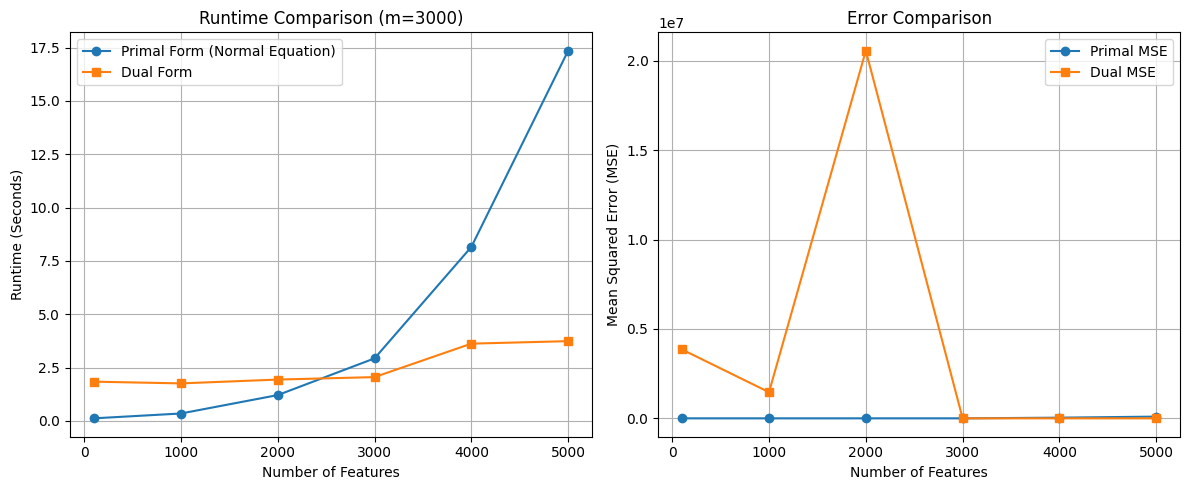

In [4]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Dataset sizes to test
number_of_features = [100, 1000, 2000, 3000, 4000, 5000]
m = 3000  # Number of instances

primal_times = []
dual_times = []
primal_errors = []
dual_errors = []

for n in number_of_features:
    # Generate dataset
    x = 2 * np.random.rand(m, n)
    y = 4 + 3 * x[:, 0] + np.random.randn(m)
    X = np.c_[np.ones((m, 1)), x]  # Add bias term

    # --- Primal Form (Normal Equation) ---
    start_time = time.time()
    theta_primal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    primal_time = time.time() - start_time
    primal_times.append(primal_time)
    
    # Calculate MSE for Primal
    y_pred_primal = X.dot(theta_primal)
    mse_primal = np.mean((y_pred_primal - y)**2)
    primal_errors.append(mse_primal)

    # --- Dual Form ---
    start_time = time.time()
    theta_dual = X.T.dot(np.linalg.inv(X.dot(X.T)).dot(y))
    dual_time = time.time() - start_time
    dual_times.append(dual_time)
    
    # Calculate MSE for Dual
    y_pred_dual = X.dot(theta_dual)
    mse_dual = np.mean((y_pred_dual - y)**2)
    dual_errors.append(mse_dual)

# --- Plot Runtime Comparison ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(number_of_features, primal_times, 'o-', label="Primal Form (Normal Equation)")
plt.plot(number_of_features, dual_times, 's-', label="Dual Form")
plt.xlabel("Number of Features")
plt.ylabel("Runtime (Seconds)")
plt.title(f"Runtime Comparison (m={m})")
plt.legend()
plt.grid(True)

# --- Plot Error Comparison ---
plt.subplot(1, 2, 2)
plt.plot(number_of_features, primal_errors, 'o-', label="Primal MSE")
plt.plot(number_of_features, dual_errors, 's-', label="Dual MSE")
plt.xlabel("Number of Features")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Error Comparison")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Appendix

Proof that $(X^T X)^{-1} X^T = X^T (X X^T)^{-1}$
when $X$ is a real matrix with full column rank.

---

Let $X$ be an $n \times d$ matrix with $n \geq d$ and full column rank.

 Start with the right-hand side:

$$
X^T (X X^T)^{-1}
$$

 Multiply both sides by $X X^T$:

$$
X^T (X X^T)^{-1} (X X^T) = X^T I = X^T
$$

 Now, consider the left-hand side:

$$(X^T X)^{-1} X^T X X^T = (X^T X)^{-1} X^T X X^T$$

But $X^T X$ is invertible, so:$(X^T X)^{-1} X^T X = I$

So:

$$
(X^T X)^{-1} X^T X X^T = I X^T = X^T
$$

 <!-- Therefore, both $(X^T X)^{-1} X^T$ and $X^T (X X^T)^{-1}$ are left inverses of $X$.

To show they are equal, multiply both sides by $X$:

$$
(X^T X)^{-1} X^T X = X^T (X X^T)^{-1} X\\

I = X^T (X X^T)^{-1} X
$$

But $X^T (X X^T)^{-1} X$ is the $d \times d$ identity matrix, so both sides are equal. -->

 Therefore,

$$
(X^T X)^{-1} X^T = X^T (X X^T)^{-1}
$$